# Normalization

In [1]:
#imports
import scanpy as sc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
adata = sc.read_h5ad("PBMC_analysis.h5ad")

In [5]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
scales_counts = sc.pp.log1p(scales_counts["X"], copy=True)

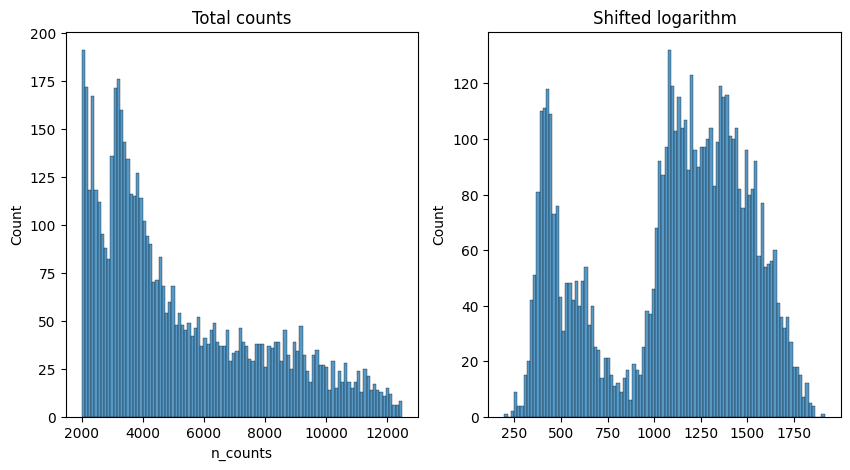

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["n_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(scales_counts.sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

## Highly variable gene selection

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [12]:
adata = adata[:, adata.var["highly_variable"]].copy()

## Scaling

In [14]:
sc.pp.scale(adata)

In [16]:
adata.write_h5ad("PBMC_analysis2.h5ad")